## 날짜별 워드 클라우드로 가장 빈도수 높은 단어 도출 (title)
- 이예빈
- 참고: 불용어 사전 (https://www.ranks.nl/stopwords/korean)

In [10]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt
import numpy as np
import pandas as pd
import re
import json
import os
import glob
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import MeCab
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import tqdm

In [2]:
try:
    if not(os.path.isdir('../data/tokenized_news')):
        os.makedirs(os.path.join('../data/tokenized_news'))
                    
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!")
        raise

In [3]:
# CSV_List로 만드는 함수
def csv2list(filename):
    lists = []
    file = open(filename,'r',encoding='utf-8')
    while True:
        line = file.readline().rstrip('\n')
        if line:
            lists.append(line)
        else:
            break
    return lists

In [4]:
stop_words = csv2list('../data/stop_words/stop_words.csv')

In [5]:
### 뉴스 제목에서 기호 제거 & 명사 추출 

def title_preprocessing(title, okt):
    title_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', ' ', title)
    word_title = okt.nouns(title_text) 
    word_title = [word for word in word_title if not word in stop_words] # 불용어 제거
    
    return word_title

In [6]:
### 전처리된 데이터프레임 by_day를 반환합니다. 
## file: csv파일이 들어있는 경로를 지정해주세요. (+ 파일까지 포함되도록!)

def all_preprocessing(file):
    df_file = pd.read_csv(file, encoding='utf-8')
    
    title = df_file['title']
    date_ = df_file['date']
    df = pd.DataFrame({'title':title, 'date':date_})
    
    okt = Okt()
    clean_text = []
    for title in df_file['title']:
        if type(title)==str:
            clean_text.append(title_preprocessing(title, okt))
        else:
            clean_text.append([])
    df['title'] = clean_text
    
    # date 컬럼 -> datetime으로 설정 
    df['date'] = pd.to_datetime(df['date'])
    by_day = df.groupby(df['date']).sum()

    # 딕셔너리 풀기
    title_text = []
    for i in range(len(by_day['title'])):
        title_text.append(', '.join(by_day['title'][i]))

    by_day['title'] = title_text
    by_day.to_csv('../data/tokenized_news/tokenized_news_title_okt_nouns', encoding='utf-8')
    
    return by_day

In [8]:
all_preprocessing('./1-8월 뉴스.csv')

,title
date,
2020-01-01,"일과, 경계, 노동, 일자리, 일거리, 정치, 노동, 기계, 정확도, 인간, 부품,..."
2020-01-02,"김정은, 머, 전략, 무기, 목격, 노동당, 전원, 회의, 결정, 작년, 수출, 두..."
2020-01-03,"엽서, 쿡방, 팬시, 팬덤, 밀레, 기억, 법, 외교부, 이라크, 정세, 불안, 국..."
2020-01-04,"계란, 피라미드, 커버, 스토리, 공습, 이란혁명, 수비대, 실세, 사망, 미군, ..."
2020-01-05,"서울, 세계, 최악, 도시, 새해, 운동, 결심, 이유, 어차피, 운동, 언니네, 체육관"
...,...
2020-08-27,"업무, 명령, 의료, 총파업, 강행, 트럼프, 미국, 대선, 가지, 관전, 포인트,..."
2020-08-28,"거리, 두기, 단계, 코로나, 확산, 대화, 단절, 응급, 중환자실, 파업, 계속,..."
2020-08-29,"의사, 파업, 의정부, 부산, 응급실, 환자, 지병, 악화, 아베, 일본, 총리, ..."


### 해당 날짜를 입력하면 워드클라우드로 만들어져 그날 많이 나온 핵심 단어 확인 가능

In [11]:
def daily_news_title_wordcloud(date_to_search):
    tmp_df = pd.read_csv('../data/tokenized_news/tokenized_news_title_okt_nouns', encoding='utf-8')
    
    cloud = WordCloud(
      font_path='../../fonts/NanumSquareRoundR.ttf'
    , width=800
    , height=600
    , max_words=100
    ).generate(''.join(tmp_df['title' ][tmp_df['date'] == date_to_search]))

    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off')

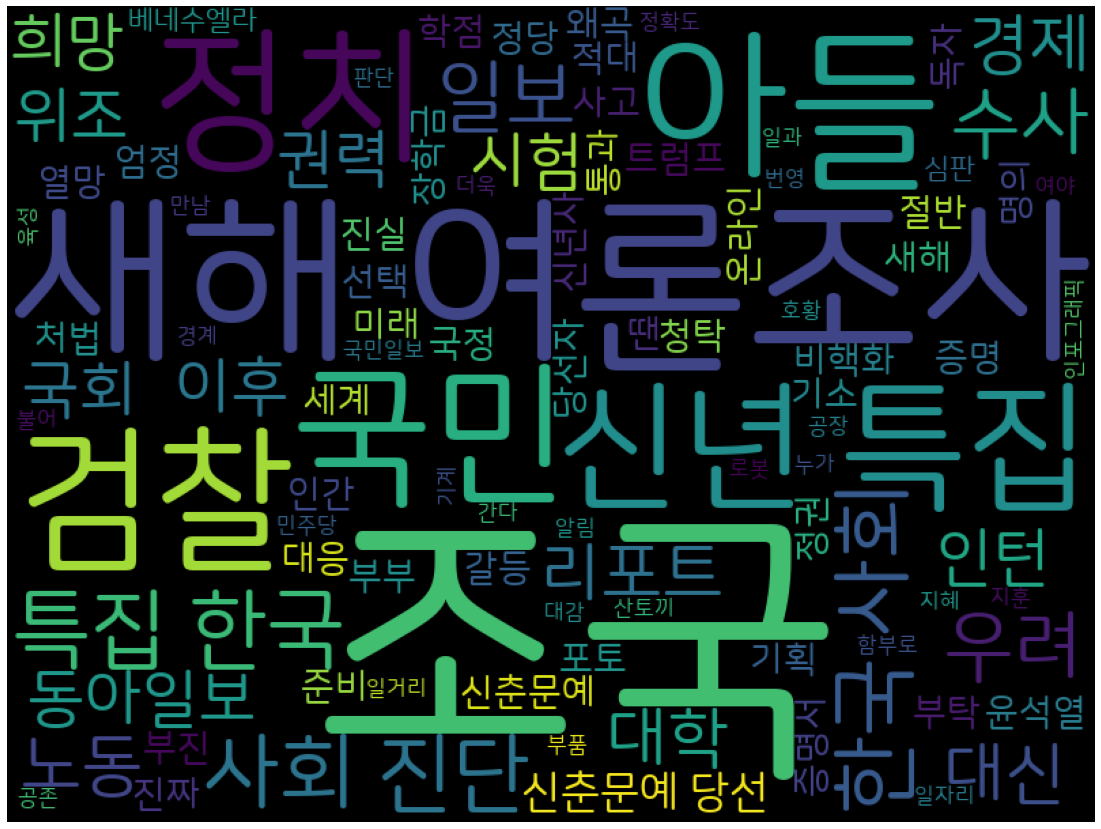

In [12]:
daily_news_title_wordcloud('2020-01-01')